In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis='columns', inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [9]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
pd.to_numeric(df.TotalCharges, errors = 'ignore').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges, errors = 'ignore').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

## Removing rows with no data

In [14]:
df1 = df[df.TotalCharges != ' ']

In [15]:
df.shape

(7043, 20)

In [16]:
df1.shape

(7032, 20)

In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Visualizing the Data

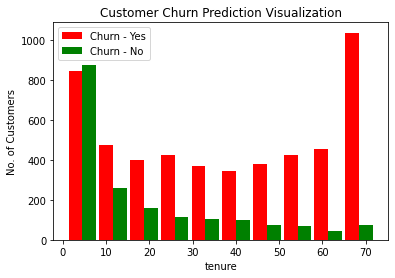

In [20]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('No. of Customers')
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_no, tenure_churn_yes], rwidth = 0.9, color = ['red', 'green'], label = ['Churn - Yes', 'Churn - No'])
plt.legend()
plt.show()


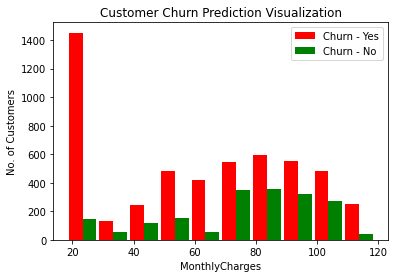

In [21]:
monthly_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
monthly_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('No. of Customers')
plt.title("Customer Churn Prediction Visualization")

plt.hist([monthly_churn_no, monthly_churn_yes], rwidth = 0.9, color = ['red', 'green'], label = ['Churn - Yes', 'Churn - No'])
plt.legend()
plt.show()


## getting the unique values from every column of the dataframe

In [22]:
df1.gender.unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
def unique_values(df):
  for i in df:
    if df[i].dtypes == 'object':
      print(f'{i} : {df[i].unique()}')

In [25]:
unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## we can convert :
### No phone service -> No
### No internet service -> No

In [26]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

In [27]:
unique_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [43]:
yes_no_columns = ['Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup', 'Partner',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [44]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [45]:
df1['Dependents'].values

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
unique_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [47]:
for i in df1:
  print(f'{i} : {df1[i].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [48]:
df1['gender'].replace({'Female' : 1, 'Male': 0}, inplace = True)

In [49]:
for i in df1:
  print(f'{i} : {df1[i].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


## One Hot Encoding

In [50]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
scaling_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[scaling_cols] = scaler.fit_transform(df2[scaling_cols])

In [52]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Train Test Splitting

In [53]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Building the ANN model

In [54]:
model = keras.Sequential([
                          keras.layers.Dense(52, input_shape = (26,), activation = 'relu'),
                          keras.layers.Dense(208, activation = 'relu'),
                          keras.layers.Dense(500, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train, epochs = 500)

2022-02-01 14:33:24.843806: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-01 14:33:25.017791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500
176/176 [==============================] - 2s 7ms/step - loss: 0.4570 - accuracy: 0.7762
Epoch 2/500
176/176 [==============================] - 1s 7ms/step - loss: 0.4210 - accuracy: 0.7996
Epoch 3/500
176/176 [==============================] - 1s 6ms/step - loss: 0.4133 - accuracy: 0.8028
Epoch 4/500
176/176 [==============================] - 1s 7ms/step - loss: 0.4091 - accuracy: 0.8108
Epoch 5/500
176/176 [==============================] - 1s 6ms/step - loss: 0.4058 - accuracy: 0.8066
Epoch 6/500
176/176 [==============================] - 1s 7ms/step - loss: 0.4020 - accuracy: 0.8096
Epoch 7/500
176/176 [==============================] - 1s 7ms/step - loss: 0.3943 - accuracy: 0.8121
Epoch 8/500
176/176 [==============================] - 1s 7ms/step - loss: 0.3904 - accuracy: 0.8181
Epoch 9/500
176/176 [==============================] - 1s 8ms/step - loss: 0.3831 - accuracy: 0.8180
Epoch 10/500
176/176 [==============================] - 1s 6ms/step - loss: 0.3778 - accura

In [55]:
model.evaluate(x_test, y_test)

27/44 [=================>............] - ETA: 0s - loss: 3.5120 - accuracy: 0.7662

2022-02-01 16:06:11.902866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 4ms/step - loss: 3.3648 - accuracy: 0.7448


[3.3648288249969482, 0.7448472380638123]

In [56]:
yp = model.predict(x_test)

2022-02-01 16:06:12.306647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [57]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1038
           1       0.51      0.50      0.51       369

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



Text(69.0, 0.5, 'Truth')

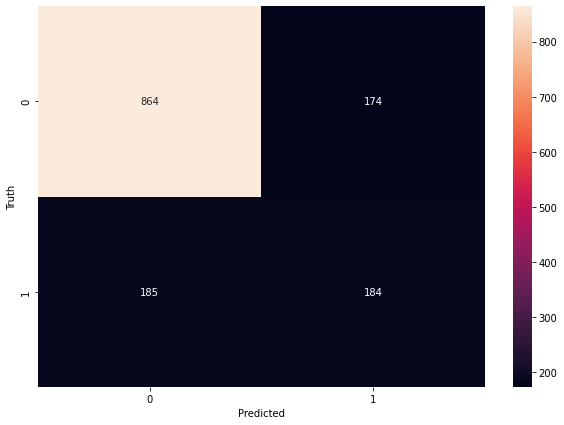

In [60]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
model = keras.Sequential([
                          keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
                          keras.layers.Dense(15, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train, epochs = 500)

Epoch 1/500


2022-02-01 16:06:12.849834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 1s 5ms/step - loss: 0.5326 - accuracy: 0.7157
Epoch 2/500
176/176 [==============================] - 1s 5ms/step - loss: 0.4345 - accuracy: 0.7881
Epoch 3/500
176/176 [==============================] - 1s 6ms/step - loss: 0.4243 - accuracy: 0.7941
Epoch 4/500
176/176 [==============================] - 1s 5ms/step - loss: 0.4208 - accuracy: 0.7964
Epoch 5/500
176/176 [==============================] - 1s 5ms/step - loss: 0.4175 - accuracy: 0.8004
Epoch 6/500
176/176 [==============================] - 1s 7ms/step - loss: 0.4151 - accuracy: 0.8014
Epoch 7/500
176/176 [==============================] - 1s 6ms/step - loss: 0.4134 - accuracy: 0.8043
Epoch 8/500
176/176 [==============================] - 1s 5ms/step - loss: 0.4121 - accuracy: 0.8073
Epoch 9/500
176/176 [==============================] - 1s 6ms/step - loss: 0.4115 - accuracy: 0.8018
Epoch 10/500
176/176 [==============================] - 1s 5ms/step - loss: 0.4095 - accuracy: 0.8057
E

In [62]:
model.evaluate(x_test, y_test)

32/44 [====================>.........] - ETA: 0s - loss: 0.6120 - accuracy: 0.7646

2022-02-01 16:14:00.245243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.7584


[0.6289690136909485, 0.7583511471748352]

Text(69.0, 0.5, 'Truth')

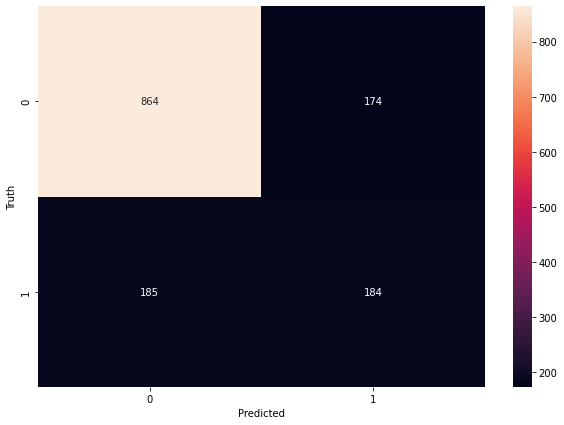

In [63]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Solving the problem of Imbalance Dataset

In [133]:
from sklearn.metrics import classification_report
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])

    if weights == -1:
        model.fit(x_train, y_train, epochs = 100)
    else:
        model.fit(x_train, y_train, epochs = 100, class_weight = weights)

    print(model.evaluate(x_test, y_test))

    y_pred = np.round(model.predict(x_test))

    print("Classification Report: - \n", classification_report(y_test, y_pred))
    return y_pred

In [72]:
y_pred = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
  9/176 [>.............................] - ETA: 1s - loss: 0.7498 - accuracy: 0.2778 

2022-02-01 16:29:25.696950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 1s 5ms/step - loss: 0.5340 - accuracy: 0.7077
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4346 - accuracy: 0.7863
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4244 - accuracy: 0.7959
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4208 - accuracy: 0.7982
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4176 - accuracy: 0.7984
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4161 - accuracy: 0.8032
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4132 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4125 - accuracy: 0.8030
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4115 - accuracy: 0.8030
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4102 - accuracy: 0.8041
E

2022-02-01 16:31:01.009463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.7875
[0.47188180685043335, 0.7874911427497864]
Classification Report: -                precision    recall  f1-score   support

           0       0.84      0.87      0.86      1038
           1       0.61      0.54      0.57       369

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



2022-02-01 16:31:01.266846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [73]:
y_test.value_counts()

0    1038
1     369
Name: Churn, dtype: int64

In [74]:
# We get a imbalance in the dataset here

In [81]:
df_churn_0 = df2[df2['Churn'] == 0]
df_churn_1 = df2[df2['Churn'] == 1]

print(len(df_churn_0), len(df_churn_1))

5163 1869


In [87]:
df_churn_0_under = df_churn_0.sample(len(df_churn_1))

#making the whole dataset
#mixing 1869 entries of churn == 0 with 1869 entries of churn == 1

df_under_final = pd.concat([df_churn_0_under, df_churn_1], axis = 'rows')

In [88]:
df_under_final.shape

(3738, 27)

## making the training and testing dataset to train the model

In [105]:
x = df_under_final.drop('Churn', axis = 'columns')
y = df_under_final['Churn']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify=y)

In [107]:
x_train.shape

(2990, 26)

In [108]:
x_test.shape

(748, 26)

In [109]:
y_train.shape

(2990,)

In [110]:
y_test.shape

(748,)

In [111]:
y_pred = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


2022-02-01 19:28:13.489299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 10ms/step - loss: 0.6234 - accuracy: 0.6696
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5201 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4965 - accuracy: 0.7669
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7689
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4836 - accuracy: 0.7749
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4810 - accuracy: 0.7759
Epoch 7/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4785 - accuracy: 0.7722
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4755 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.7776
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.7753
Epoch 11/100
94/94 [

2022-02-01 19:29:05.339044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 8ms/step - loss: 0.5403 - accuracy: 0.7433
[0.540282666683197, 0.7433155179023743]
Classification Report: -                precision    recall  f1-score   support

           0       0.74      0.76      0.75       374
           1       0.75      0.73      0.74       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



2022-02-01 19:29:05.617349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [113]:
df_under_final.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [114]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

# Treating imbalance with oversampling

In [115]:
print(len(df_churn_0), len(df_churn_1))

5163 1869


In [118]:
df_churn_1_oversampling = df_churn_1.sample(len(df_churn_0), replace=True)

In [120]:
df_churn_1_oversampling.shape

(5163, 27)

In [121]:
#making the oversampled churn_1 dataframe and churn_0 dataframe in one

In [122]:
df_oversampling = pd.concat([df_churn_1_oversampling,df_churn_0], axis = 'rows')

In [123]:
df_oversampling.shape

(10326, 27)

In [124]:
x = df_oversampling.drop('Churn', axis = 'columns')
y = df_oversampling.Churn

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [155]:
y_pred = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
  1/259 [..............................] - ETA: 1:17 - loss: 0.7300 - accuracy: 0.4062

2022-02-01 23:13:20.635745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 2s 6ms/step - loss: 0.5422 - accuracy: 0.7362
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4716 - accuracy: 0.7769
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4620 - accuracy: 0.7815
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4574 - accuracy: 0.7827
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4525 - accuracy: 0.7827
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4477 - accuracy: 0.7835
Epoch 7/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4450 - accuracy: 0.7864
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4392 - accuracy: 0.7918
Epoch 9/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4364 - accuracy: 0.7948
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4324 - accuracy: 0.7952
E

2022-02-01 23:15:39.872751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 0s 4ms/step - loss: 0.4101 - accuracy: 0.8180
[0.4101164937019348, 0.8180058002471924]
Classification Report: - 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.80      0.85      0.82      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



2022-02-01 23:15:40.224080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


# Treating Imbalance dataset with SMOTE

In [135]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [146]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
x, y = smote.fit_resample(x,y)
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [152]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [153]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [157]:
y_pred = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
  1/259 [..............................] - ETA: 1:06 - loss: 0.7052 - accuracy: 0.5000

2022-02-01 23:15:58.396901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 2s 5ms/step - loss: 0.5394 - accuracy: 0.7345
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4722 - accuracy: 0.7759
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4608 - accuracy: 0.7809
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4556 - accuracy: 0.7821
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4515 - accuracy: 0.7826
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4475 - accuracy: 0.7878
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4425 - accuracy: 0.7891
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4386 - accuracy: 0.7918
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4350 - accuracy: 0.7927
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4317 - accuracy: 0.7959
E

2022-02-01 23:18:25.858420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8156
[0.41000887751579285, 0.8155856728553772]
Classification Report: - 
               precision    recall  f1-score   support

           0       0.86      0.76      0.80      1033
           1       0.78      0.87      0.83      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.81      2066
weighted avg       0.82      0.82      0.81      2066



2022-02-01 23:18:26.183670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


# Teating dataset imbalance with Ensemble

In [158]:
x = df2.drop('Churn', axis = 'columns')
y = df2.Churn

In [159]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [161]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [162]:
4130/1495

2.762541806020067

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [170]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [179]:
df3_0 = df3[df3.Churn == 0]
df3_1 = df3[df3.Churn == 1]

In [180]:
def training_batch(majority, minority, start, end):
    df_training_batch = pd.concat([majority[start:end], minority], axis = 'rows')

    x_train = df_training_batch.drop('Churn', axis = 'columns')
    y_train = df_training_batch.Churn

    return x_train, y_train

In [185]:
x_train, y_train = training_batch(df3_0, df3_1, 0, 1495)

y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


2022-02-02 01:09:28.399921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 6ms/step - loss: 0.6222 - accuracy: 0.6712
Epoch 2/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5178 - accuracy: 0.7475
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4920 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.7742
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7759
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4718 - accuracy: 0.7796
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.7793
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4660 - accuracy: 0.7826
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4628 - accuracy: 0.7833
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4622 - accuracy: 0.7836
Epoch 11/100
94/94 [=

2022-02-02 01:10:20.237453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 4ms/step - loss: 0.6011 - accuracy: 0.7136
[0.6010532975196838, 0.713575005531311]
Classification Report: - 
               precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



2022-02-02 01:10:20.558993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [186]:
x_train, y_train = training_batch(df3_0, df3_1, 1495, 2990)

y_pred2 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
 7/94 [=>............................] - ETA: 0s - loss: 0.7018 - accuracy: 0.5000  

2022-02-02 01:10:21.500288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 2s 7ms/step - loss: 0.6290 - accuracy: 0.6625
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5388 - accuracy: 0.7391
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5192 - accuracy: 0.7482
Epoch 4/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5106 - accuracy: 0.7565
Epoch 5/100
94/94 [==============================] - 1s 9ms/step - loss: 0.5048 - accuracy: 0.7542
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5012 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4991 - accuracy: 0.7555
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4959 - accuracy: 0.7599
Epoch 9/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4937 - accuracy: 0.7575
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4919 - accuracy: 0.7582
Epoch 11/100
94/94 [=

2022-02-02 01:11:18.174087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 4ms/step - loss: 0.5294 - accuracy: 0.7321
[0.5294002890586853, 0.7320540547370911]
Classification Report: - 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1033
           1       0.50      0.72      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.73      0.74      1407



2022-02-02 01:11:18.473282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [187]:
x_train, y_train = training_batch(df3_0, df3_1, 2990, 4130)

y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
 1/83 [..............................] - ETA: 23s - loss: 0.6912 - accuracy: 0.5938

2022-02-02 01:11:18.785968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 1s 7ms/step - loss: 0.6175 - accuracy: 0.6767
Epoch 2/100
83/83 [==============================] - 0s 5ms/step - loss: 0.5245 - accuracy: 0.7575
Epoch 3/100
83/83 [==============================] - 0s 5ms/step - loss: 0.5019 - accuracy: 0.7685
Epoch 4/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4926 - accuracy: 0.7689
Epoch 5/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4860 - accuracy: 0.7700
Epoch 6/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4826 - accuracy: 0.7734
Epoch 7/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4792 - accuracy: 0.7791
Epoch 8/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4773 - accuracy: 0.7723
Epoch 9/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4744 - accuracy: 0.7787
Epoch 10/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4737 - accuracy: 0.7776
Epoch 11/100
83/83 [=

2022-02-02 01:12:09.354556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.7001
[0.6041935086250305, 0.7000710964202881]
Classification Report: - 
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      1033
           1       0.46      0.81      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407



2022-02-02 01:12:09.653371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [190]:
y_pred = y_pred1.copy()
for i in range(len(y_pred)):
    x = y_pred1[i] + y_pred2[i] + y_pred3[i]

    if x > 1:
        y_pred[i] = 1
    else:
        y_pred[i] = 0


In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

